### **Binary Classification**

성적에 따라 합격, 불합격 여부가 갈리는 경우

보통 다음과 같은 S자 그래프가 나옴

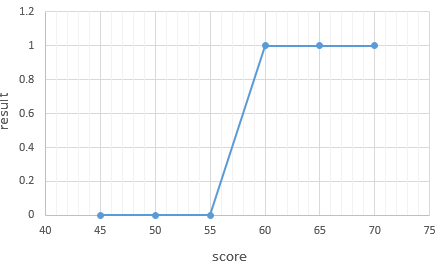

하지만 선형 회귀처럼 H(x) = Wx + b를 가설로 하기엔

직선으로 S자 그래프를 표현할 수 없어 아쉬움이 있음

때문에 시그모이드 함수를 통해 H(x) = f(Wx + b)를

가설로 이용하는 것이 좋아보임

---
### **Sigmoid Function**

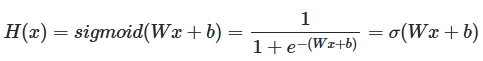

시그모이드 함수의 방정식은 다음과 같음

In [3]:
%matplotlib inline # %matplotlib inline을 사용하면 그래프가 별도의 팝업 창이 아니라, 노트북의 셀 바로 아래에 나타남
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

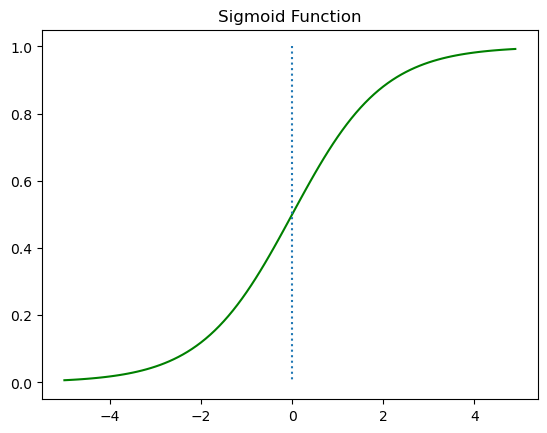

In [5]:
# W가 1이고 b가 0인 그래프

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데에 점선을 추가함
plt.title('Sigmoid Function')
plt.show()

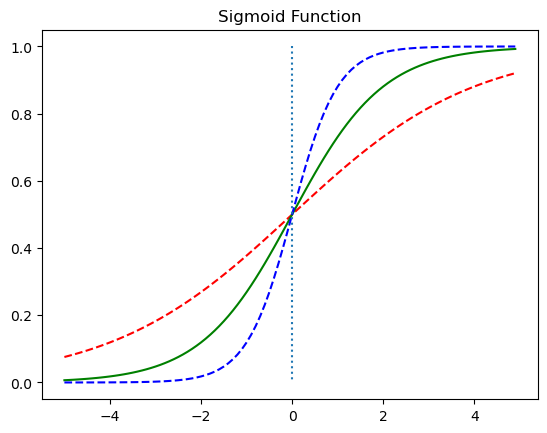

In [ ]:
# W값의 변환에 따른 경사도의 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W = 0.5
plt.plot(x, y2, 'g') # W = 1
plt.plot(x, y3, 'b', linestyle="--") # W = 2
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데에 점선을 추가함
plt.title('Sigmoid Function')
plt.show()

위 결과로 보아 W값이 커짐에 따라 경사도 커짐을 알 수 있음

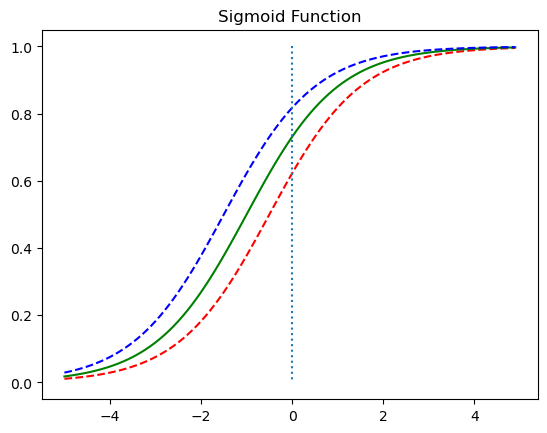

In [8]:
# b값의 변화에 따른 좌, 우 이동

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데에 점선 추가함
plt.title("Sigmoid Function")
plt.show()

b값이 커짐에 따라 좌측으로 이동, 작아지면 우측으로 이동

시그모이드 함수는 입력값이 커지면 1에 수렴하고

입력값이 작아지면 0에 수렴함

시그모이드의 출력값은 0과 1의 사이의 값을 가지는데

이를 이용해 분류 작업에 이용할 수 있음음

예를 들어 임계값을 0.5라고 정해두고

0.5 이상이면 1(True), 이하면 0(False)으로 둘 수 있음

---
### **Cost Function**

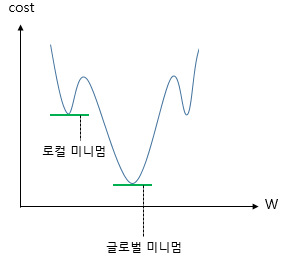

H(x) = Wx + b 떄와 달리

H(x) = sigmoid(Wx + b)를 미분 시 위와 유사한 비볼록 형태의 그래프가 나옴

위 그래프에서 경사 하강법 시 문제가 생길 수 있음

오차가 최소가 된다고 판단한 지점이 완전히 최소값이 되는 구간이 아닐 수 있음

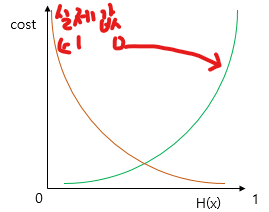

실제값이 1일 때는 예측값인 H(x)가 1이면 오차가 0이므로 cost가 0이 됨

반면 H(x)가 0으로 수렴하면 cost가 무한대로 발산하게 됨

이를 식으로 표현하면 다음과 같음

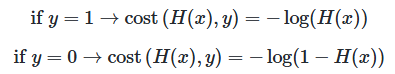

if문을 사용한 다음 식을 아래와 같이 통합하여 나타낼 수 있음

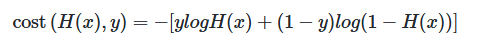

이를 통해 위 식으로도 MSE를 구할 수 있음

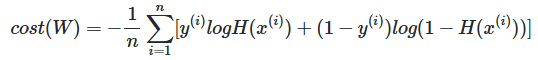

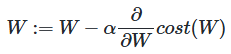

경사하강법의 가중치 업데이트를 수식으로 나타내면 위와 같음

---
### **파이토치로 로지스틱 회귀 구현**

In [9]:
# 환경 설정 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [10]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [11]:
print(x_train.shape)
print(y_train.shape)

# 모양으로 보다 XW가 성립되기 위해서는
# W벡터의 크기는 2 x 1임

torch.Size([6, 2])
torch.Size([6, 1])


In [12]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [13]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
# hypothesis = torch.sigmoid(x_train.matmul(W) + b) 와 같음

In [14]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [15]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [16]:
# 하나의 원소에 대해서만 오차 구해보기

-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [17]:
# 모든 원소에 대해서 오차 구하기

losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
# F.binary_cross_entropy(hypothesis, y_train) 와 같음
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [18]:
# 전체 오차에 대한 평균 구하기기

cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [19]:
# 데이터

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [20]:
# 모델 초기화

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정

optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

    # 훈련 후 W, b에 값이 남아 있음

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [22]:
# 결과 확인해보기

hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [23]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
